# Import libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
from pymodulon.core import IcaData
from pymodulon import example_data
from pymodulon.io import save_to_json, load_json_model
from pymodulon.example_data import load_ecoli_data

# Creating ica_data object

## Annotation tables

### Gene table

In [3]:
gene_table = pd.read_csv("../../data/PRECISE-1K_data_files/gene_info.csv")
gene_table.index = gene_table['Unnamed: 0']
gene_table.rename(columns={"cog":"COG"},inplace=True)
gene_table.drop('Unnamed: 0',axis=1,inplace=True)
gene_table.index.name = None
gene_table.head()

,gene_name,synonyms,gene_product,COG,regulator,uniprot,start,end,strand,essential,...,y_ome,k_eff,schmidt_prot_med,heckmann_prot_med,proteomics,p1k,p1k_ctrl_log_tpm,p1k_median_log_tpm,p1k_mad_log_tpm,in_iM
b0002,thrA,thrA;thrA1;thrA2,fused aspartate kinase/homoserine dehydrogenase 1,Amino acid transport and metabolism,"RpoD,Ile-tRNA,Thr-tRNA,DksA,Fnr,ArcA,ppGpp",P00561,337,2799,+,False,...,False,True,4101.5,4434.0,True,True,10.314562,9.605329,1.042143,True
b0003,thrB,thrB,homoserine kinase,Nucleotide transport and metabolism,"RpoD,Ile-tRNA,Thr-tRNA,DksA,ppGpp",P00547,2801,3733,+,False,...,False,True,442.0,1177.0,True,True,9.982251,9.232803,1.035654,True
b0004,thrC,thrC,threonine synthase,Amino acid transport and metabolism,"RpoD,ppGpp,Ile-tRNA,Thr-tRNA,DksA",P00934,3734,5020,+,False,...,False,True,8818.5,3516.0,True,True,9.973666,9.274271,0.906287,True
b0005,yaaX,yaaX,DUF2502 domain-containing protein YaaX,Function unknown,Lrp,P75616,5234,5530,+,False,...,True,False,NaN,NaN,False,True,7.132482,6.283661,1.093146,True
b0006,yaaA,yaaA,peroxide stress resistance protein YaaA,Function unknown,NaN,P0A8I3,5683,6459,-,False,...,True,True,539.5,333.0,True,True,6.494941,6.346626,0.454519,True


### Sample table

In [4]:
sample_table = pd.read_csv("../../data/PRECISE-1K_data_files/sample_table.csv")
sample_table.index = sample_table['sample']
sample_table.drop('Unnamed: 0',axis=1,inplace=True)
sample_table.drop('sample',axis=1,inplace=True)
sample_table.index.name = "Sample ID"
sample_table.head()

,study,project,condition,rep_id,Strain Description,Strain,Culture Type,Evolved Sample,Base Media,Temperature (C),...,creator,passed_fastqc,passed_pct_reads_mapped,passed_reads_mapped_to_CDS,passed_global_correlation,full_name,passed_similar_replicates,passed_number_replicates,run_date,n_replicates
Sample ID,,,,,,,,,,,,,,,,,,,,,
control__wt_glc__1,Control,control,wt_glc,1,Escherichia coli K-12 MG1655,MG1655,Batch,No,M9,37,...,Sangwoo Seo,True,True,True,True,control:wt_glc,True,True,4/17/13,2
control__wt_glc__2,Control,control,wt_glc,2,Escherichia coli K-12 MG1655,MG1655,Batch,No,M9,37,...,Sangwoo Seo,True,True,True,True,control:wt_glc,True,True,4/17/13,2
fur__wt_dpd__1,Fur,fur,wt_dpd,1,Escherichia coli K-12 MG1655,MG1655,Batch,No,M9,37,...,Sangwoo Seo,True,True,True,True,fur:wt_dpd,True,True,10-02-2013,2
fur__wt_dpd__2,Fur,fur,wt_dpd,2,Escherichia coli K-12 MG1655,MG1655,Batch,No,M9,37,...,Sangwoo Seo,True,True,True,True,fur:wt_dpd,True,True,10-02-2013,2
fur__wt_fe__1,Fur,fur,wt_fe,1,Escherichia coli K-12 MG1655,MG1655,Batch,No,M9,37,...,Sangwoo Seo,True,True,True,True,fur:wt_fe,True,True,09-05-2013,2


### iM table

In [5]:
# imodulon_table = pd.read_csv("../../../_data/ica_data/p1k_data_files/iM_table.csv")
# imodulon_table.index = imodulon_table['name']
# imodulon_table.drop('k',axis=1,inplace=True)
# imodulon_table.head()

imodulon_table = pd.read_csv("../../data/PRECISE-1K_data_files/imodulon_table.csv", index_col=0)
imodulon_table.index.name = 'name'
imodulon_table.head()

,exp_var,imodulon_size,enrichment_category,system_category,functional_category,function,regulator,n_regs,pvalue,qvalue,...,single_gene_dominant_technical,tcs,regulon_discovery,ko,PRECISE 2.0,PRECISE 2.0_pearson,PRECISE 2.0_spearman,PRECISE,PRECISE_pearson,PRECISE_spearman
name,,,,,,,,,,,,,,,,,,,,,
Sugar Diacid,0.002413,14,Regulatory,Metabolism,Carbon Metabolism,Transport and catabolism of carbohydrate diaci...,CdaR,1.0,1.595767e-24,7.110896e-20,...,False,False,False,False,CdaR,0.952054,0.758726,CdaR,0.905552,0.562704
Translation,0.007469,53,Regulatory,Translation,Translation,Ribosome biogenesis,DksA,1.0,7.972755e-65,5.125923e-60,...,False,False,False,False,Translation,0.892858,0.764432,translation,0.667232,0.482602
ygdT,0.000344,3,Technical,Single Gene,Unknown,Unknown,NaN,NaN,NaN,NaN,...,True,False,False,False,SG_ygdT,0.653472,0.422661,NaN,NaN,NaN
OxyR,0.001747,38,Regulatory,Stress Responses,Redox Stress,"Oxidative stress response, especially peroxide",OxyR,1.0,2.620144e-27,4.708660e-23,...,False,False,False,False,OxyR,0.926352,0.730520,OxyR,0.621129,0.254705
FlhDC-2,0.030021,43,Regulatory,Stress Responses,Extracellular Structures,Flagellum biosynthesis and export,FlhDC,1.0,7.733764e-62,3.447790e-57,...,False,False,False,False,FlhDC-2,0.917180,0.439455,FlhDC,0.907624,0.310641


## M

In [6]:
M = pd.read_csv("../../data/PRECISE-1K_data_files/M.csv",)
M.index = M['Unnamed: 0']
M.drop('Unnamed: 0',axis=1,inplace=True)
M.index.name = None

M.columns = list(imodulon_table.index)
M

,Sugar Diacid,Translation,ygdT,OxyR,FlhDC-2,Osmoprotectant,Glutamine,Sialic Acid,yqhI,ROS TALE Amp,...,Tryptophanase,crp KO-2,cyoB/ndh/nuoB KO-2,tpiA KO,Phage Shock,Glyoxylate,CCK-PGI Del,Acetate,Ile/Val,UC-8
b0002,-0.005367,-0.002423,0.010140,-0.001362,-0.017297,0.008631,-0.006491,0.092469,-0.010978,-0.003400,...,-0.012070,-0.008812,0.004996,0.008216,-0.002720,0.007874,-0.004350,-0.013319,0.009296,0.000891
b0003,0.006212,-0.001901,0.007207,0.000073,-0.004829,-0.003186,-0.011677,0.082103,0.011074,-0.004679,...,0.006683,-0.017798,0.000964,0.003273,0.010018,0.002132,-0.005826,-0.010836,-0.066654,-0.003513
b0004,0.010600,-0.002205,0.004961,-0.002289,-0.004938,-0.005587,-0.008127,0.080888,0.007511,0.003887,...,0.008132,-0.018105,-0.007763,0.009103,-0.002566,-0.007120,-0.005676,-0.002164,-0.060155,-0.007025
b0005,0.011520,0.008573,0.020449,-0.003123,0.002009,-0.026382,-0.016374,0.022484,0.007903,0.017561,...,-0.000139,0.001437,0.001827,-0.008113,0.065835,-0.019238,-0.001622,-0.009303,-0.069669,-0.004241
b0006,0.003482,-0.002293,-0.010146,0.140794,-0.001754,0.000974,0.023500,-0.017665,0.006247,-0.005761,...,0.017025,0.005473,-0.002252,0.002807,-0.030303,0.000805,0.028367,0.018293,-0.018444,-0.033624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b4747,-0.003644,0.018245,-0.003134,0.004992,-0.000873,-0.021262,-0.012556,0.036707,-0.062935,0.016316,...,0.002969,-0.012892,0.024815,-0.000077,-0.004676,0.015222,0.011431,0.013733,0.011955,0.001203
b4748,0.010023,-0.030343,-0.000578,-0.002526,-0.000906,0.000805,0.007411,-0.021330,-0.013622,-0.034542,...,0.004057,-0.001059,-0.007595,0.002024,0.001573,-0.029301,-0.007873,0.021424,-0.001528,-0.000353
b4751,0.001082,0.013560,0.010030,-0.022409,0.006737,-0.012387,-0.002341,-0.010584,-0.015837,0.003776,...,-0.005873,-0.000560,0.008653,0.005759,0.029820,-0.004053,0.026769,0.020823,0.000414,-0.001453
b4755,-0.002204,-0.006527,0.003732,-0.000946,-0.009858,0.010553,-0.022747,0.003496,0.530162,0.000412,...,0.024388,0.003566,0.004696,-0.003552,0.002161,0.000556,-0.005656,0.021056,0.008180,0.021366


## Thresholds

In [7]:
thresholds = pd.read_csv("../../data/PRECISE-1K_data_files/M_thresholds.csv")
thresholds.index = list(imodulon_table.index)
thresholds = thresholds.drop("Unnamed: 0", axis=1)
thresholds = thresholds["0"].to_dict()
# thresholds

## A and sample table

In [8]:
A = pd.read_csv("../../data/PRECISE-1K_data_files/A.csv",)
A.index = A['Unnamed: 0']
A.drop('Unnamed: 0',axis=1,inplace=True)
A.index.name = None

A.columns = list(sample_table.index)
A.index = list(imodulon_table.index)
A

,control__wt_glc__1,control__wt_glc__2,fur__wt_dpd__1,fur__wt_dpd__2,fur__wt_fe__1,fur__wt_fe__2,fur__delfur_dpd__1,fur__delfur_dpd__2,fur__delfur_fe2__1,fur__delfur_fe2__2,...,DDB3__PD-006_del-rpoS_Batch_9h__2,DDB3__PD-006_del-rpoS_Fed-batch_6h__1,DDB3__PD-006_del-rpoS_Fed-batch_6h__2,DDB3__PD-006_del-rpoS_Fed-batch_6h__3,DDB3__PD-006_del-rpoS_Fed-batch_15h__1,DDB3__PD-006_del-rpoS_Fed-batch_15h__2,DDB3__PD-009_del-tnaA_Batch_6h__1,DDB3__PD-009_del-tnaA_Fed-batch_6h__1,DDB3__PD-009_del-tnaA_Fed-batch_15h__1,DDB3__PD-009_del-tnaA_Fed-batch_15h__2
Sugar Diacid,0.048851,-0.048851,2.226245,2.238391,0.222740,0.383348,1.534940,1.480178,0.536021,0.167563,...,0.605951,3.969272,3.960774,3.431303,3.198403,3.865406,1.095074,2.575524,1.850326,2.035736
Translation,0.201055,-0.201055,-8.162122,-8.046208,1.633678,1.973262,-8.058080,-6.272859,-1.536470,-1.828831,...,2.416670,-1.187724,-1.626310,-1.492168,-0.436511,-1.004710,5.258995,-1.782148,-4.601815,-5.110518
ygdT,-0.382475,0.382475,0.066040,-0.898701,-0.556961,-1.523642,0.039413,0.002855,0.256867,-1.890067,...,-1.885401,0.689130,1.997418,2.177559,1.459224,-3.110064,4.336594,0.626609,-0.166365,0.539555
OxyR,0.130714,-0.130714,0.232581,-0.135165,-0.140487,-0.435341,-0.788937,-1.333850,0.255054,0.464381,...,-2.743285,-2.888544,-2.341820,-2.498864,-2.931448,-2.693465,-1.690293,-3.056924,-3.575826,-2.316941
FlhDC-2,-0.329000,0.329000,-5.319409,-5.196873,-7.144849,-6.758991,-5.930140,-5.934485,-1.775148,-3.070194,...,4.303118,1.626655,2.701441,1.840211,2.703303,1.862170,10.399505,-4.285524,2.349262,3.101853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Glyoxylate,0.344877,-0.344877,5.450515,5.444039,-0.641401,-0.472477,5.557743,5.070821,0.423674,0.559522,...,1.180854,2.036347,2.514846,2.469912,2.064530,2.645660,0.830452,4.243346,2.047711,2.828812
CCK-PGI Del,0.077106,-0.077106,-0.260639,0.163570,1.030188,1.220775,-0.049178,0.392918,1.611484,1.699807,...,-0.360018,0.689914,1.350155,0.510417,1.075789,2.065799,-2.090274,0.143198,-0.551313,0.908994
Acetate,0.575197,-0.575197,-2.476044,-2.875184,-0.756414,-0.251539,-1.737154,-1.652438,-1.304588,-1.319442,...,1.637433,5.259582,6.259438,5.784253,4.928517,4.221586,0.574095,12.177624,12.558275,12.767103
Ile/Val,0.226627,-0.226627,1.699217,1.678226,-1.167426,-0.618004,2.100661,2.068120,-1.050492,-1.504338,...,0.388348,-1.066533,-0.469043,-1.736812,-0.701636,-0.657140,1.027797,-2.860252,-1.283872,-1.949882


## X

In [9]:
X = pd.read_csv("../../data/PRECISE-1K_data_files/log_tpm.csv")
X.index = X['Unnamed: 0']
X.drop('Unnamed: 0',axis=1,inplace=True)
X.index.name = None
X.columns = list(sample_table.index)
X

,control__wt_glc__1,control__wt_glc__2,fur__wt_dpd__1,fur__wt_dpd__2,fur__wt_fe__1,fur__wt_fe__2,fur__delfur_dpd__1,fur__delfur_dpd__2,fur__delfur_fe2__1,fur__delfur_fe2__2,...,DDB3__PD-006_del-rpoS_Batch_9h__2,DDB3__PD-006_del-rpoS_Fed-batch_6h__1,DDB3__PD-006_del-rpoS_Fed-batch_6h__2,DDB3__PD-006_del-rpoS_Fed-batch_6h__3,DDB3__PD-006_del-rpoS_Fed-batch_15h__1,DDB3__PD-006_del-rpoS_Fed-batch_15h__2,DDB3__PD-009_del-tnaA_Batch_6h__1,DDB3__PD-009_del-tnaA_Fed-batch_6h__1,DDB3__PD-009_del-tnaA_Fed-batch_15h__1,DDB3__PD-009_del-tnaA_Fed-batch_15h__2
b0002,-0.053993,0.053993,0.879043,1.089600,0.182453,-0.078873,-0.837092,-0.502703,0.421312,0.412354,...,-0.868029,-2.012060,-1.862453,-1.950586,-1.642161,-1.666869,-0.639387,-1.552748,-1.892598,-1.831359
b0003,-0.061973,0.061973,1.063330,1.477889,0.392573,0.234671,-0.763015,-0.120989,0.546181,0.520841,...,-1.501588,-2.532496,-2.515189,-2.443481,-2.258418,-2.312108,-1.124294,-2.060022,-2.348524,-2.122772
b0004,-0.036972,0.036972,0.003132,0.356702,-0.096756,-0.334913,-1.714913,-1.322707,-0.234147,-0.250669,...,-0.691635,-1.692102,-1.608955,-1.723764,-1.376420,-1.251488,-0.529185,-1.577833,-1.383521,-1.527079
b0005,-0.104967,0.104967,-1.118145,-1.277963,-0.181546,-0.364057,-2.121475,-1.994770,-0.386684,-0.634659,...,-2.925632,-4.626965,-4.067417,-2.964371,-3.075562,-3.101967,-2.210546,-3.821019,-4.563928,-2.946659
b0006,0.042242,-0.042242,-0.123592,-0.107778,-0.173177,-0.089888,-0.208133,-0.003044,-0.034707,-0.027806,...,0.190536,-0.618740,-0.175381,-0.317349,-0.466331,-0.169979,-0.402588,-0.915991,-0.804728,-0.858978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b4747,0.619141,-0.619141,-0.619141,-0.619141,0.202715,-0.619141,0.734510,-0.619141,0.790289,0.284033,...,-0.619141,0.766947,-0.619141,-0.619141,-0.619141,-0.619141,-0.619141,-0.619141,-0.619141,1.164489
b4748,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.421363,0.000000,0.000000,0.000000,...,5.441998,5.734377,5.614587,5.648036,5.957326,6.657140,3.672372,4.138619,5.809142,4.465101
b4751,-0.039552,0.039552,-1.290021,-1.298327,-0.481621,-0.609865,-1.680827,-1.239934,-0.134430,-0.363082,...,0.274369,-0.356653,-0.371515,-0.064824,-0.504051,0.323457,-1.267812,-0.534742,0.039449,-0.051373
b4755,-0.235166,0.235166,2.621649,3.256277,-0.302443,-0.096198,2.518406,3.268205,1.379971,0.910647,...,-0.633352,-0.039091,-0.136657,0.734843,1.699093,-2.399592,-2.399592,3.413940,1.914515,1.564518


## TRN

In [10]:
trn = pd.read_csv("../../data/PRECISE-1K_data_files/trn.csv")
trn.drop('Unnamed: 0',axis=1,inplace=True)
trn.head()

,regulator,gene_name,gene_id,effect,evidence,source
0,AccB,accB,b3255,-,0.0,RegulonDB_TF
1,RpoD,pheP,b0576,+,0.0,RegulonDB_sigma
2,RpoD,pheA,b2599,+,0.0,RegulonDB_sigma
3,RpoD,pgpB,b1278,+,0.0,RegulonDB_sigma
4,RpoD,pgpA,b0418,+,0.0,RegulonDB_sigma


## Creating ica_data

In [11]:
ica_data = IcaData(
    M = M,
    A = A, 
    X = X,
    gene_table = gene_table,
    sample_table = sample_table,
    imodulon_table = imodulon_table,
    trn = trn,
    thresholds = thresholds,                  
)

## Saving ica_data

In [12]:
from pymodulon.io import *
from os import path

In [13]:
save_to_json(ica_data,"../../data/ica_data/ecoli_p1k.json")

# Loading exisitng ica_data

In [14]:
ica_data = load_json_model("../../data/ica_data/ecoli_p1k.json")

# Adding additional DDB data

## Loading uncentered log_tpm

In [15]:
ddb_log_tpm = pd.read_csv("../../data/ddb_expression_data/ddb_log_tpm.csv")
ddb_log_tpm.index = ddb_log_tpm['Geneid']
ddb_log_tpm.drop('Geneid',axis=1,inplace=True)
ddb_log_tpm.index.name = None
ddb_log_tpm

,DDB_0234,DDB_0235,DDB_0236,DDB_0237,DDB_0238,DDB_0239,DDB_0240,DDB_0241,DDB_0242,DDB_0243,...,DDB_0324,DDB_0325,DDB_0326,DDB_0327,DDB_0328,DDB_0329,DDB_0330,DDB_0331,DDB_0332,DDB_0333
b0002,9.448933,9.509896,8.821175,8.856159,9.299789,8.760734,8.921736,9.467969,9.398685,8.792083,...,9.312503,8.786304,8.727300,9.361091,8.804129,9.320209,9.312404,9.094473,8.453849,8.572583
b0003,8.717789,8.741307,8.210023,8.392685,8.639559,8.276989,8.501638,8.503805,8.512454,8.284217,...,8.712658,8.193781,8.208011,8.303767,8.077940,9.307621,8.744098,8.122026,8.059971,7.537550
b0004,9.813930,9.787558,8.674743,8.715598,9.632974,8.579256,8.740202,9.680539,9.639738,8.647408,...,9.468117,8.992829,8.939315,9.358475,9.289252,10.234342,9.343875,9.215067,8.691977,8.927410
b0005,3.906064,4.192713,3.975149,3.182964,3.687472,4.008139,3.692332,3.769685,4.098399,3.823767,...,4.108046,3.408921,3.182574,4.213782,4.219267,5.284285,4.025761,3.975771,2.613880,2.062004
b0006,6.663616,6.576673,5.705934,5.762556,6.693162,5.753884,5.513442,6.848047,6.697032,5.630171,...,6.491830,5.736715,5.789629,6.629908,5.730971,5.645178,6.375173,6.509502,5.705966,5.778615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b4399,3.688038,3.570378,3.867195,3.628737,3.731722,3.460401,3.747317,3.684170,3.541686,3.894879,...,3.789148,3.663047,3.472920,3.916511,3.197249,3.417849,3.371107,3.352241,3.524818,3.690834
b4400,2.393017,2.389853,3.613236,3.236747,2.217868,3.738420,3.584511,2.208581,2.042326,3.528033,...,2.412023,2.836759,3.240342,2.646979,4.648678,4.901327,2.422973,2.011515,3.417602,3.161387
b4401,9.282887,9.330075,10.214229,10.291678,9.378383,10.244486,10.312549,9.527553,9.461950,10.254754,...,9.511258,9.747980,9.748693,9.240623,9.275357,9.367403,9.474800,9.831484,9.620363,9.685012
b4402,4.565000,4.439952,4.336496,2.393909,4.645603,4.592002,3.093719,4.624385,4.748752,3.633927,...,3.216447,4.279785,4.525023,4.442559,3.944526,4.133183,4.853457,5.383107,3.994303,5.049105


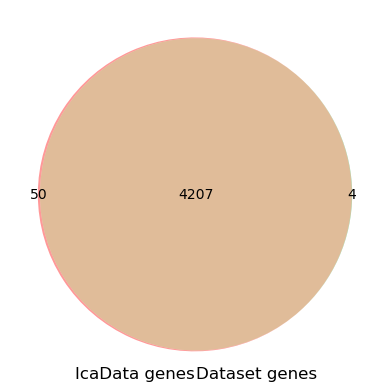

In [16]:
from matplotlib_venn import venn2
venn2((set(ica_data.gene_names),set(ddb_log_tpm.index)), set_labels=['IcaData genes','Dataset genes'])

## Loading and adding p1k log_tpm (uncentered)

In [17]:
log_tpm_p1k_ref = pd.read_csv("../../data/PRECISE-1K_data_files/p1k_average_reference_log_tpm.csv")
log_tpm_p1k_ref.rename(columns={"geneid":"Geneid"},inplace=True)
log_tpm_p1k_ref.index = log_tpm_p1k_ref['Geneid']
log_tpm_p1k_ref.drop('Geneid',axis=1,inplace=True)
log_tpm_p1k_ref

,Reference
Geneid,
b0001,10.372833
b0002,10.314562
b0003,9.982251
b0004,9.973666
b0005,7.132482
...,...
b4753,2.577658
b4754,3.153057
b4755,2.399592


In [18]:
ddb_combined_log_tpm = pd.concat([log_tpm_p1k_ref,ddb_log_tpm],axis=1)
ddb_combined_log_tpm.head()

,Reference,DDB_0234,DDB_0235,DDB_0236,DDB_0237,DDB_0238,DDB_0239,DDB_0240,DDB_0241,DDB_0242,...,DDB_0324,DDB_0325,DDB_0326,DDB_0327,DDB_0328,DDB_0329,DDB_0330,DDB_0331,DDB_0332,DDB_0333
b0001,10.372833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b0002,10.314562,9.448933,9.509896,8.821175,8.856159,9.299789,8.760734,8.921736,9.467969,9.398685,...,9.312503,8.786304,8.727300,9.361091,8.804129,9.320209,9.312404,9.094473,8.453849,8.572583
b0003,9.982251,8.717789,8.741307,8.210023,8.392685,8.639559,8.276989,8.501638,8.503805,8.512454,...,8.712658,8.193781,8.208011,8.303767,8.077940,9.307621,8.744098,8.122026,8.059971,7.537550
b0004,9.973666,9.813930,9.787558,8.674743,8.715598,9.632974,8.579256,8.740202,9.680539,9.639738,...,9.468117,8.992829,8.939315,9.358475,9.289252,10.234342,9.343875,9.215067,8.691977,8.927410
b0005,7.132482,3.906064,4.192713,3.975149,3.182964,3.687472,4.008139,3.692332,3.769685,4.098399,...,4.108046,3.408921,3.182574,4.213782,4.219267,5.284285,4.025761,3.975771,2.613880,2.062004


## Centering DDB log_tpm to p1k reference

In [19]:
ddb_centered_log_tpm = ddb_combined_log_tpm.sub(ddb_combined_log_tpm['Reference'],axis=0)
# dropping reference column, as it is already in p1k
ddb_centered_log_tpm.drop('Reference',axis=1,inplace=True)
ddb_centered_log_tpm

,DDB_0234,DDB_0235,DDB_0236,DDB_0237,DDB_0238,DDB_0239,DDB_0240,DDB_0241,DDB_0242,DDB_0243,...,DDB_0324,DDB_0325,DDB_0326,DDB_0327,DDB_0328,DDB_0329,DDB_0330,DDB_0331,DDB_0332,DDB_0333
b0001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b0002,-0.865629,-0.804666,-1.493387,-1.458403,-1.014773,-1.553829,-1.392826,-0.846593,-0.915877,-1.522480,...,-1.002059,-1.528258,-1.587262,-0.953471,-1.510434,-0.994353,-1.002158,-1.220089,-1.860713,-1.741979
b0003,-1.264461,-1.240943,-1.772228,-1.589566,-1.342692,-1.705262,-1.480612,-1.478446,-1.469796,-1.698033,...,-1.269592,-1.788470,-1.774240,-1.678484,-1.904311,-0.674630,-1.238152,-1.860225,-1.922280,-2.444701
b0004,-0.159736,-0.186109,-1.298923,-1.258068,-0.340693,-1.394410,-1.233464,-0.293127,-0.333928,-1.326258,...,-0.505550,-0.980837,-1.034351,-0.615191,-0.684414,0.260676,-0.629791,-0.758599,-1.281689,-1.046256
b0005,-3.226418,-2.939769,-3.157332,-3.949518,-3.445010,-3.124343,-3.440150,-3.362797,-3.034082,-3.308715,...,-3.024436,-3.723561,-3.949908,-2.918700,-2.913214,-1.848197,-3.106721,-3.156711,-4.518602,-5.070478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b4753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b4754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b4755,-0.285330,-1.634830,1.908049,1.113624,-0.833602,2.472977,2.278465,-1.107847,-0.089155,2.494717,...,-0.383166,1.781381,1.743105,-0.531934,0.047070,-0.063120,-0.019895,0.344081,1.407832,2.219778
b4756,-1.105350,-1.405046,0.251088,-0.457528,-1.427818,1.101024,0.107081,-2.171397,-2.072898,0.924324,...,-0.080891,-0.746028,-0.636725,-0.877974,-0.729973,-0.208787,-1.024473,-0.783464,-0.695329,-1.752643


## Inferring iM activities for DDB (p1k centered)

In [20]:
from pymodulon.util import infer_activities

In [21]:
ddb_activities = infer_activities(ica_data,ddb_centered_log_tpm.dropna())
ddb_activities.head()

C:\Users\jonas\anaconda3\lib\site-packages\pymodulon\util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  shared_genes = ica_data.M.index & data.index


,DDB_0234,DDB_0235,DDB_0236,DDB_0237,DDB_0238,DDB_0239,DDB_0240,DDB_0241,DDB_0242,DDB_0243,...,DDB_0324,DDB_0325,DDB_0326,DDB_0327,DDB_0328,DDB_0329,DDB_0330,DDB_0331,DDB_0332,DDB_0333
Sugar Diacid,0.331301,0.171529,1.234692,1.114587,0.455587,1.632743,1.161263,0.574516,0.327555,1.349010,...,1.807932,2.317686,1.460205,2.019035,1.473417,1.578143,1.167986,0.662381,2.191966,1.373504
Translation,3.163605,3.477473,-2.359159,-1.944765,2.365454,-3.086986,-2.203364,3.338844,2.581492,-3.188294,...,1.662139,-4.814976,-5.079839,-0.563716,-0.640290,-2.627888,2.105290,2.691111,-5.040184,-4.369128
ygdT,-2.298699,0.193064,0.181321,-0.434836,-0.847090,-1.370683,-0.919413,-0.096665,-0.862278,-0.100027,...,-1.216313,0.176305,-0.866240,-1.239568,1.164622,0.458304,-0.476101,-0.140963,0.250114,-0.607947
OxyR,-2.323673,-2.560230,-1.667721,-1.852758,-2.860929,-1.743401,-1.526768,-2.969990,-2.834350,-1.780343,...,-2.129654,-2.966721,-3.205780,-3.229743,-3.811630,-3.728023,-2.322389,-2.391972,-3.298982,-3.594827
FlhDC-2,0.804463,0.526254,-1.667456,-2.075087,-0.259729,-1.439588,-2.653044,1.059050,0.987397,4.856032,...,5.098096,0.769690,0.991886,-0.023398,-3.247681,-4.195476,15.159582,15.234198,12.801267,13.424295


In [22]:
# sample table for ddb_sd
ddb_sample_table = pd.read_csv("../../data/ddb_expression_data/ddb_metadata_qc.csv", index_col=0)
ddb_sample_table.head()

,sample_id,study,project,condition,rep_id,Biological Replicates,run_date,Strain Description,Strain,Base Media,...,SRX,Run,LibraryLayout,Platform,passed_fastqc,passed_pct_reads_mapped,passed_reads_mapped_to_CDS,passed_global_correlation,full_name,passed_replicate_correlations
precise_ID,,,,,,,,,,,,,,,,,,,,,
DDB_0234,DDB_PD_036_AMBR_R13_S02_RNA_seq,DDB_PD_036,ddb_pd_036,[DDB_PD_036]_[DDB35_ZnCtrl]_[Batch]_[0h],1,2,24/04/2021,Escherichia coli K-12 BW25113 del-fhuA,DDB35,DDB_BM_002,...,NaN,NaN,PAIRED,ILLUMINA,True,True,True,True,ddb_pd_036:[DDB_PD_036]_[DDB35_ZnCtrl]_[Batch]...,True
DDB_0235,DDB_PD_036_AMBR_R14_S02_RNA_seq,DDB_PD_036,ddb_pd_036,[DDB_PD_036]_[DDB35_ZnCtrl]_[Batch]_[0h],2,2,24/04/2021,Escherichia coli K-12 BW25113 del-fhuA,DDB35,DDB_BM_002,...,NaN,NaN,PAIRED,ILLUMINA,True,True,True,True,ddb_pd_036:[DDB_PD_036]_[DDB35_ZnCtrl]_[Batch]...,True
DDB_0236,DDB_PD_036_AMBR_R13_S10_RNA_seq,DDB_PD_036,ddb_pd_036,[DDB_PD_036]_[DDB35_ZnCtrl]_[Fed-batch]_[16h],1,2,24/04/2021,Escherichia coli K-12 BW25113 del-fhuA,DDB35,DDB_BM_002,...,NaN,NaN,PAIRED,ILLUMINA,True,True,True,True,ddb_pd_036:[DDB_PD_036]_[DDB35_ZnCtrl]_[Fed-ba...,True
DDB_0237,DDB_PD_036_AMBR_R14_S10_RNA_seq,DDB_PD_036,ddb_pd_036,[DDB_PD_036]_[DDB35_ZnCtrl]_[Fed-batch]_[16h],2,2,24/04/2021,Escherichia coli K-12 BW25113 del-fhuA,DDB35,DDB_BM_002,...,NaN,NaN,PAIRED,ILLUMINA,True,True,True,True,ddb_pd_036:[DDB_PD_036]_[DDB35_ZnCtrl]_[Fed-ba...,True
DDB_0238,DDB_PD_036_AMBR_R15_S02_RNA_seq,DDB_PD_036,ddb_pd_036,[DDB_PD_036]_[SDT107_ZnCtrl]_[Batch]_[0h],1,1,24/04/2021,Escherichia coli K-12 BW25113 del-fhuA del-zur,SDT107,DDB_BM_002,...,NaN,NaN,PAIRED,ILLUMINA,True,True,True,True,ddb_pd_036:[DDB_PD_036]_[SDT107_ZnCtrl]_[Batch...,False


# Adding additional DDB-SD data

## Loading uncentered log_tpm

In [23]:
ddb_sd_log_tpm = pd.read_csv("../../data/ddb_expression_data/ddb_scale-down_log_tpm.csv")
ddb_sd_log_tpm.index = ddb_sd_log_tpm['Geneid']
ddb_sd_log_tpm.drop('Geneid',axis=1,inplace=True)
ddb_sd_log_tpm.index.name = None
ddb_sd_log_tpm

,PD_117_R11_S05#,PD_117_R12_S05#,PD_117_R13_S05#,PD_117_R5_S05#1,PD_117_R6_S05#1,PD_117_R7_S05#1,PD_121_R11_S05#,PD_121_R13_S05#,PD_121_R15_S05#,PD_121_R5_S05#2,...,PD_122_R13_S05#,PD_122_R15_S05#,PD_122_R5_S05#2,PD_122_R7_S05#2,PD_122_R9_S05#2,PD_123_R11_S05#,PD_123_R13_S05#,PD_123_R5_S05#1,PD_123_R7_S05#1,PD_123_R9_S05#1
b0001,10.268826,10.233329,9.989378,11.052673,10.989912,11.092299,10.817368,10.551445,11.122732,12.797314,...,10.572000,11.599272,12.518072,11.525809,10.640512,11.458297,10.085499,11.546252,10.547354,11.109756
b0002,9.522497,9.117753,9.139083,7.754347,7.821709,7.905215,8.149490,7.571752,7.939145,7.442674,...,7.619234,7.742226,7.450286,7.081873,8.219873,8.198950,7.732953,7.723273,7.555798,8.184395
b0003,9.083923,8.782278,8.742474,7.602189,7.711155,7.781399,7.991727,7.738916,7.683083,7.578276,...,7.909356,7.472493,7.548537,7.684912,8.038399,7.915476,7.802649,7.644197,7.675395,7.931424
b0004,8.404835,8.363498,8.215478,7.274509,7.244816,7.338556,7.627758,7.406189,7.247002,7.167144,...,7.302630,7.015931,7.179748,7.307277,7.653091,7.717659,7.348478,7.255310,7.229710,7.605211
b0005,5.696586,5.560236,5.819425,3.851237,4.256504,3.998828,6.012667,3.841057,4.596360,4.125692,...,3.918487,4.543305,3.935906,4.613781,5.011440,5.964758,4.239501,3.685820,4.067940,4.822042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b4399,4.561330,4.487753,4.325511,4.551826,4.398872,4.569813,4.454972,4.631709,4.517231,4.500765,...,4.658288,4.804971,4.563525,4.500093,4.426769,4.470585,4.411007,4.348199,4.440989,4.309950
b4400,3.965982,3.852544,3.911157,4.697106,4.493906,4.659369,4.535153,4.516409,4.446401,4.490401,...,4.543382,4.675646,4.547283,4.625591,4.049967,4.559304,4.425840,4.526718,4.508516,4.035002
b4401,9.383944,9.550908,9.519744,9.874631,9.808178,9.873173,9.294735,9.922178,9.844154,9.851140,...,9.782182,9.870322,9.860149,9.609780,9.860395,9.150501,9.835445,9.812988,9.685340,9.855633
b4402,4.110482,4.243250,3.835672,4.029079,3.798413,3.690707,3.278418,4.537916,4.006879,2.738171,...,4.281067,3.566571,3.788874,3.844928,3.506251,3.066592,4.266947,3.653702,4.138357,4.194130


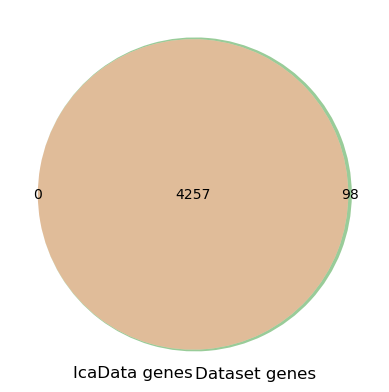

In [24]:
from matplotlib_venn import venn2
venn2((set(ica_data.gene_names),set(ddb_sd_log_tpm.index)), set_labels=['IcaData genes','Dataset genes'])

## Loading and adding p1k log_tpm (uncentered)

In [25]:
log_tpm_p1k_ref = pd.read_csv("../../data/PRECISE-1K_data_files/p1k_average_reference_log_tpm.csv")
log_tpm_p1k_ref.rename(columns={"geneid":"Geneid"},inplace=True)
log_tpm_p1k_ref.index = log_tpm_p1k_ref['Geneid']
log_tpm_p1k_ref.drop('Geneid',axis=1,inplace=True)
log_tpm_p1k_ref

,Reference
Geneid,
b0001,10.372833
b0002,10.314562
b0003,9.982251
b0004,9.973666
b0005,7.132482
...,...
b4753,2.577658
b4754,3.153057
b4755,2.399592


In [26]:
ddb_sd_combined_log_tpm = pd.concat([log_tpm_p1k_ref,ddb_sd_log_tpm],axis=1)
ddb_sd_combined_log_tpm.head()

,Reference,PD_117_R11_S05#,PD_117_R12_S05#,PD_117_R13_S05#,PD_117_R5_S05#1,PD_117_R6_S05#1,PD_117_R7_S05#1,PD_121_R11_S05#,PD_121_R13_S05#,PD_121_R15_S05#,...,PD_122_R13_S05#,PD_122_R15_S05#,PD_122_R5_S05#2,PD_122_R7_S05#2,PD_122_R9_S05#2,PD_123_R11_S05#,PD_123_R13_S05#,PD_123_R5_S05#1,PD_123_R7_S05#1,PD_123_R9_S05#1
b0001,10.372833,10.268826,10.233329,9.989378,11.052673,10.989912,11.092299,10.817368,10.551445,11.122732,...,10.572000,11.599272,12.518072,11.525809,10.640512,11.458297,10.085499,11.546252,10.547354,11.109756
b0002,10.314562,9.522497,9.117753,9.139083,7.754347,7.821709,7.905215,8.149490,7.571752,7.939145,...,7.619234,7.742226,7.450286,7.081873,8.219873,8.198950,7.732953,7.723273,7.555798,8.184395
b0003,9.982251,9.083923,8.782278,8.742474,7.602189,7.711155,7.781399,7.991727,7.738916,7.683083,...,7.909356,7.472493,7.548537,7.684912,8.038399,7.915476,7.802649,7.644197,7.675395,7.931424
b0004,9.973666,8.404835,8.363498,8.215478,7.274509,7.244816,7.338556,7.627758,7.406189,7.247002,...,7.302630,7.015931,7.179748,7.307277,7.653091,7.717659,7.348478,7.255310,7.229710,7.605211
b0005,7.132482,5.696586,5.560236,5.819425,3.851237,4.256504,3.998828,6.012667,3.841057,4.596360,...,3.918487,4.543305,3.935906,4.613781,5.011440,5.964758,4.239501,3.685820,4.067940,4.822042


## Centering DDB-SD log_tpm to p1k reference

In [27]:
ddb_sd_centered_log_tpm = ddb_sd_combined_log_tpm.sub(ddb_sd_combined_log_tpm['Reference'],axis=0)
# dropping reference column, as it is already in p1k
ddb_sd_centered_log_tpm.drop('Reference',axis=1,inplace=True)
ddb_sd_centered_log_tpm

,PD_117_R11_S05#,PD_117_R12_S05#,PD_117_R13_S05#,PD_117_R5_S05#1,PD_117_R6_S05#1,PD_117_R7_S05#1,PD_121_R11_S05#,PD_121_R13_S05#,PD_121_R15_S05#,PD_121_R5_S05#2,...,PD_122_R13_S05#,PD_122_R15_S05#,PD_122_R5_S05#2,PD_122_R7_S05#2,PD_122_R9_S05#2,PD_123_R11_S05#,PD_123_R13_S05#,PD_123_R5_S05#1,PD_123_R7_S05#1,PD_123_R9_S05#1
b0001,-0.104007,-0.139504,-0.383456,0.679840,0.617079,0.719466,0.444535,0.178612,0.749898,2.424481,...,0.199167,1.226439,2.145239,1.152976,0.267679,1.085463,-0.287334,1.173418,0.174521,0.736923
b0002,-0.792065,-1.196810,-1.175480,-2.560216,-2.492853,-2.409348,-2.165072,-2.742811,-2.375417,-2.871888,...,-2.695328,-2.572336,-2.864277,-3.232690,-2.094689,-2.115612,-2.581609,-2.591290,-2.758764,-2.130168
b0003,-0.898327,-1.199972,-1.239777,-2.380061,-2.271096,-2.200851,-1.990524,-2.243334,-2.299168,-2.403975,...,-2.072895,-2.509758,-2.433713,-2.297339,-1.943852,-2.066774,-2.179602,-2.338054,-2.306855,-2.050827
b0004,-1.568831,-1.610168,-1.758189,-2.699157,-2.728850,-2.635110,-2.345908,-2.567477,-2.726664,-2.806522,...,-2.671036,-2.957735,-2.793918,-2.666389,-2.320575,-2.256007,-2.625188,-2.718357,-2.743956,-2.368455
b0005,-1.435895,-1.572246,-1.313057,-3.281245,-2.875978,-3.133653,-1.119815,-3.291424,-2.536122,-3.006790,...,-3.213995,-2.589177,-3.196576,-2.518701,-2.121041,-1.167724,-2.892980,-3.446662,-3.064541,-2.310440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b4753,-2.577658,-2.577658,-2.577658,-2.577658,-2.577658,-2.577658,-2.577658,-2.577658,-2.577658,-2.577658,...,-1.463300,-2.577658,-2.577658,-2.577658,-1.444253,-2.577658,-0.852550,-2.577658,-2.577658,-2.577658
b4754,-3.153057,-2.043284,-1.462093,-3.153057,-2.163713,-1.153266,-0.004759,-1.585547,-1.139834,-1.091713,...,-3.153057,-2.144701,-2.099170,-1.455217,-1.128148,-0.692733,-2.161517,-0.540068,-1.572162,-0.788609
b4755,-0.818578,-1.166233,-1.197902,-0.066109,-0.246276,-0.662821,-2.399592,-0.449474,-0.039658,-1.239810,...,-0.431513,0.387236,0.190621,-0.544330,-0.203843,-1.671239,-0.242848,-0.639047,-0.058719,-0.625352
b4756,1.876592,1.637668,1.539081,1.310260,1.208178,1.567084,1.505515,1.567566,1.262746,2.104436,...,1.913131,1.294245,2.147729,1.983073,1.342044,1.654320,1.369361,1.477149,1.612875,1.538404


## Inferring iM activities for DDB-SD (p1k centered)

In [28]:
from pymodulon.util import infer_activities

In [29]:
ddb_sd_activities = infer_activities(ica_data,ddb_sd_centered_log_tpm.dropna())
ddb_sd_activities.head()

C:\Users\jonas\anaconda3\lib\site-packages\pymodulon\util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  shared_genes = ica_data.M.index & data.index


,PD_117_R11_S05#,PD_117_R12_S05#,PD_117_R13_S05#,PD_117_R5_S05#1,PD_117_R6_S05#1,PD_117_R7_S05#1,PD_121_R11_S05#,PD_121_R13_S05#,PD_121_R15_S05#,PD_121_R5_S05#2,...,PD_122_R13_S05#,PD_122_R15_S05#,PD_122_R5_S05#2,PD_122_R7_S05#2,PD_122_R9_S05#2,PD_123_R11_S05#,PD_123_R13_S05#,PD_123_R5_S05#1,PD_123_R7_S05#1,PD_123_R9_S05#1
Sugar Diacid,1.020167,1.197345,0.850214,1.884631,2.006588,1.928753,2.605104,3.179034,0.529734,2.059154,...,2.670059,0.390093,1.986497,2.384238,2.629524,2.265654,2.998503,2.151260,2.333841,2.853875
Translation,-10.902840,-10.164764,-10.259274,-9.349791,-9.269482,-8.940989,-7.881888,-11.540566,-6.459737,-10.370931,...,-12.803982,-6.924444,-10.423111,-12.038561,-9.422214,-8.722169,-12.364902,-9.675677,-11.308496,-10.294053
ygdT,0.041506,-0.670147,0.132523,-0.703101,-1.084092,-0.249750,0.325400,-0.434226,-1.235260,-1.364842,...,-0.633307,-1.122295,-0.132912,0.190628,-1.269414,0.163118,-0.202011,-0.996200,-0.692009,-0.562191
OxyR,-1.613056,-1.555714,-1.694463,-1.719415,-1.800261,-1.558568,-1.224959,-1.986415,-0.942595,-1.673349,...,-2.229486,-1.126497,-1.733400,-2.367149,-1.738279,-1.252700,-2.029506,-1.645087,-2.083950,-1.412224
FlhDC-2,3.611298,6.416080,7.623470,4.093645,4.667234,3.912069,10.180854,-3.602757,-6.668586,4.883587,...,-3.121825,-6.618233,7.013652,-3.016734,11.296260,9.645942,-2.552929,4.664456,-2.841635,11.138505


In [30]:
# sample table for ddb_sd
ddb_sd_sample_table = pd.read_csv("../../data/ddb_expression_data/ddb_scale-down_metadata.csv", index_col=0)
ddb_sd_sample_table.head()

,sample_id,study,project,condition,rep_id,Strain Description,Strain,Culture Type,Evolved Sample,Base Media,...,passed_fastqc,passed_pct_reads_mapped,passed_reads_mapped_to_CDS,passed_global_correlation,full_name,passed_similar_replicates,passed_number_replicates,run_date,n_replicates,data_source
PD_117_R11_S05#,PD_117_R11_S05#,DDB feast-famine scale-down,ddb_ff_sd,HMP3071 C-lim,1,Escherichia coli K-12 BW25113 FolE(T198I) YnbB...,HMP3071,Fed-batch,No,DDB_BM_016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ddb_sd
PD_117_R12_S05#,PD_117_R12_S05#,DDB feast-famine scale-down,ddb_ff_sd,HMP3071 C-lim,2,Escherichia coli K-12 BW25113 FolE(T198I) YnbB...,HMP3071,Fed-batch,No,DDB_BM_016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ddb_sd
PD_117_R13_S05#,PD_117_R13_S05#,DDB feast-famine scale-down,ddb_ff_sd,HMP3071 C-lim,3,Escherichia coli K-12 BW25113 FolE(T198I) YnbB...,HMP3071,Fed-batch,No,DDB_BM_016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ddb_sd
PD_117_R5_S05#1,PD_117_R5_S05#1,DDB feast-famine scale-down,ddb_ff_sd,DDB35 C-lim,1,Escherichia coli K-12 BW25113 del_fhuA,DDB35,Fed-batch,No,DDB_BM_016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ddb_sd
PD_117_R6_S05#1,PD_117_R6_S05#1,DDB feast-famine scale-down,ddb_ff_sd,DDB35 C-lim,2,Escherichia coli K-12 BW25113 del_fhuA,DDB35,Fed-batch,No,DDB_BM_016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ddb_sd


# Combining activities and sample tables with p1k

In [31]:
new_activities = pd.concat([ica_data.A,ddb_activities,ddb_sd_activities],axis=1)
new_activities.head()

,control__wt_glc__1,control__wt_glc__2,fur__wt_dpd__1,fur__wt_dpd__2,fur__wt_fe__1,fur__wt_fe__2,fur__delfur_dpd__1,fur__delfur_dpd__2,fur__delfur_fe2__1,fur__delfur_fe2__2,...,PD_122_R13_S05#,PD_122_R15_S05#,PD_122_R5_S05#2,PD_122_R7_S05#2,PD_122_R9_S05#2,PD_123_R11_S05#,PD_123_R13_S05#,PD_123_R5_S05#1,PD_123_R7_S05#1,PD_123_R9_S05#1
Sugar Diacid,0.048851,-0.048851,2.226245,2.238391,0.222740,0.383348,1.534940,1.480178,0.536021,0.167563,...,2.670059,0.390093,1.986497,2.384238,2.629524,2.265654,2.998503,2.151260,2.333841,2.853875
Translation,0.201055,-0.201055,-8.162122,-8.046208,1.633678,1.973262,-8.058080,-6.272859,-1.536470,-1.828831,...,-12.803982,-6.924444,-10.423111,-12.038561,-9.422214,-8.722169,-12.364902,-9.675677,-11.308496,-10.294053
ygdT,-0.382475,0.382475,0.066040,-0.898701,-0.556961,-1.523642,0.039413,0.002855,0.256867,-1.890067,...,-0.633307,-1.122295,-0.132912,0.190628,-1.269414,0.163118,-0.202011,-0.996200,-0.692009,-0.562191
OxyR,0.130714,-0.130714,0.232581,-0.135165,-0.140487,-0.435341,-0.788937,-1.333850,0.255054,0.464381,...,-2.229486,-1.126497,-1.733400,-2.367149,-1.738279,-1.252700,-2.029506,-1.645087,-2.083950,-1.412224
FlhDC-2,-0.329000,0.329000,-5.319409,-5.196873,-7.144849,-6.758991,-5.930140,-5.934485,-1.775148,-3.070194,...,-3.121825,-6.618233,7.013652,-3.016734,11.296260,9.645942,-2.552929,4.664456,-2.841635,11.138505


In [32]:
log_tpm_combined = pd.concat([ica_data.X,ddb_centered_log_tpm,ddb_sd_centered_log_tpm],axis=1)
log_tpm_combined.head()

,control__wt_glc__1,control__wt_glc__2,fur__wt_dpd__1,fur__wt_dpd__2,fur__wt_fe__1,fur__wt_fe__2,fur__delfur_dpd__1,fur__delfur_dpd__2,fur__delfur_fe2__1,fur__delfur_fe2__2,...,PD_122_R13_S05#,PD_122_R15_S05#,PD_122_R5_S05#2,PD_122_R7_S05#2,PD_122_R9_S05#2,PD_123_R11_S05#,PD_123_R13_S05#,PD_123_R5_S05#1,PD_123_R7_S05#1,PD_123_R9_S05#1
b0002,-0.053993,0.053993,0.879043,1.089600,0.182453,-0.078873,-0.837092,-0.502703,0.421312,0.412354,...,-2.695328,-2.572336,-2.864277,-3.232690,-2.094689,-2.115612,-2.581609,-2.591290,-2.758764,-2.130168
b0003,-0.061973,0.061973,1.063330,1.477889,0.392573,0.234671,-0.763015,-0.120989,0.546181,0.520841,...,-2.072895,-2.509758,-2.433713,-2.297339,-1.943852,-2.066774,-2.179602,-2.338054,-2.306855,-2.050827
b0004,-0.036972,0.036972,0.003132,0.356702,-0.096756,-0.334913,-1.714913,-1.322707,-0.234147,-0.250669,...,-2.671036,-2.957735,-2.793918,-2.666389,-2.320575,-2.256007,-2.625188,-2.718357,-2.743956,-2.368455
b0005,-0.104967,0.104967,-1.118145,-1.277963,-0.181546,-0.364057,-2.121475,-1.994770,-0.386684,-0.634659,...,-3.213995,-2.589177,-3.196576,-2.518701,-2.121041,-1.167724,-2.892980,-3.446662,-3.064541,-2.310440
b0006,0.042242,-0.042242,-0.123592,-0.107778,-0.173177,-0.089888,-0.208133,-0.003044,-0.034707,-0.027806,...,-1.022555,-0.129034,-0.821813,-1.102582,-0.988141,-0.419074,-0.856065,-0.713617,-0.981595,-0.809348


In [33]:
new_sample_table = pd.concat([ica_data.sample_table,ddb_sample_table,ddb_sd_sample_table],axis=0)

# Creating ica data object

In [34]:
new_combined_X = log_tpm_combined

M = ica_data.M.copy()
# dropping genes in X that are not part of M
for i in new_combined_X.index:
    if i not in ica_data.M.index:
        new_combined_X.drop(i, inplace=True)
        
new_combined_X = new_combined_X.loc[M.index]

In [35]:
combined_ica_data = IcaData(
    M = ica_data.M.copy(),
    A = new_activities,
    X = new_combined_X,
    gene_table = ica_data.gene_table,
    sample_table = new_sample_table,
    imodulon_table = ica_data.imodulon_table,
    trn = ica_data.trn,
    thresholds = ica_data.thresholds
)

# Saving combined ica_data

In [36]:
save_to_json(combined_ica_data,"../../data/ica_data/ecoli_p1k_with_additional_ddb.json")